In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from fancyimpute import IterativeImputer, KNN

### Prepare Data to Include Artificial Missingness

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/Fehlende%20Werte/airquality.csv'
airquality = pd.read_csv(url)

airquality.head()   

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [22]:
# Remove missing values from the DataFrame
airquality_cleaned = airquality.dropna()

# Create a copy of the cleaned DataFrame to introduce artificial missingness
airquality_with_nan = airquality_cleaned.copy()

# Create a mask for 20% of the data to be set as missing
nan_mask = np.random.rand(len(airquality_with_nan)) < 0.2

# Apply the mask to introduce missing values to the 'Ozone' column
airquality_with_nan.loc[nan_mask, 'Ozone'] = np.nan

# Display the first few rows of the DataFrame with artificial missingness
airquality_with_nan.head()


,Ozone,Solar.R,Wind,Temp,Month,Day
0,NaN,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7


### Imputation of Missing Data

In [23]:
# KNN imputation
imputer_knn = KNN()
airquality_knn = pd.DataFrame(imputer_knn.fit_transform(airquality), columns=airquality.columns)


Imputing row 1/111 with 0 missing, elapsed time: 0.005
Imputing row 101/111 with 0 missing, elapsed time: 0.006


/home/steffen/.local/lib/python3.10/site-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [24]:
# Iterative Robust Model Imputation (IRMI)
imputer_irmi = IterativeImputer()
airquality_irmi = pd.DataFrame(imputer_irmi.fit_transform(airquality), columns=airquality.columns)

### Visualization of Imputed Data

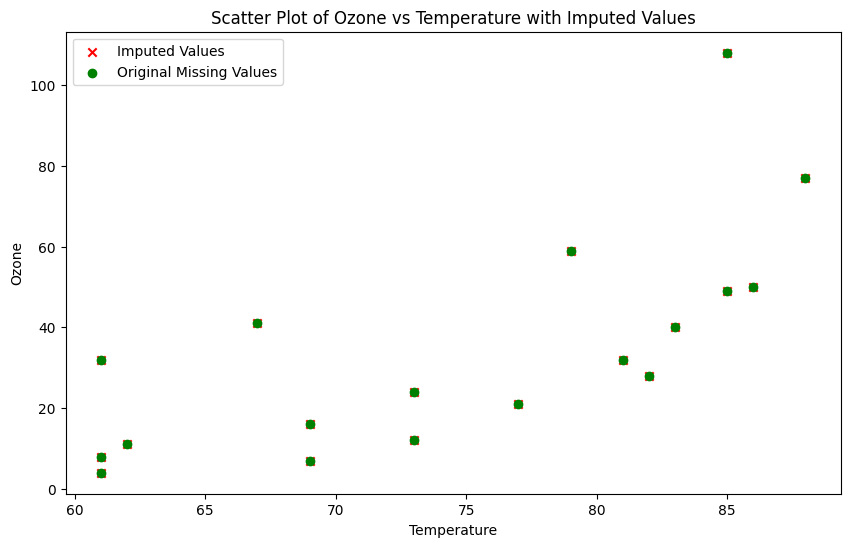

In [35]:
# Plotting
plt.figure(figsize=(10, 6))

# # Plot original non-missing values
# plt.scatter(airquality_cleaned['Temp'][~nan_mask], 
#             airquality_cleaned['Ozone'][~nan_mask], 
#             color='blue', label='Existing Values')

# Plot imputed values
plt.scatter(airquality_cleaned['Temp'][nan_mask], 
            airquality_irmi['Ozone'][nan_mask], 
            color='red', label='Imputed Values', marker='x')

# Plot original missing values before imputation
plt.scatter(airquality_cleaned['Temp'][nan_mask], 
            airquality_cleaned['Ozone'][nan_mask], 
            color='green', label='Original Missing Values', marker='o')

plt.xlabel('Temperature')
plt.ylabel('Ozone')
plt.title('Scatter Plot of Ozone vs Temperature with Imputed Values')
plt.legend()
plt.show()


In [25]:
# Define a function for scatter plots that highlights imputed values
def plot_scatter_with_imputation(data, x, y, mask, title='Scatter Plot', xlabel='X-axis', ylabel='Y-axis'):
    plt.figure(figsize=(10, 6))
    # Plot non-imputed points
    sns.scatterplot(x=data.loc[~mask, x], y=data.loc[~mask, y], color='blue', label='Original')
    # Plot imputed points
    sns.scatterplot(x=data.loc[mask, x], y=data.loc[mask, y], color='red', label='Imputed')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

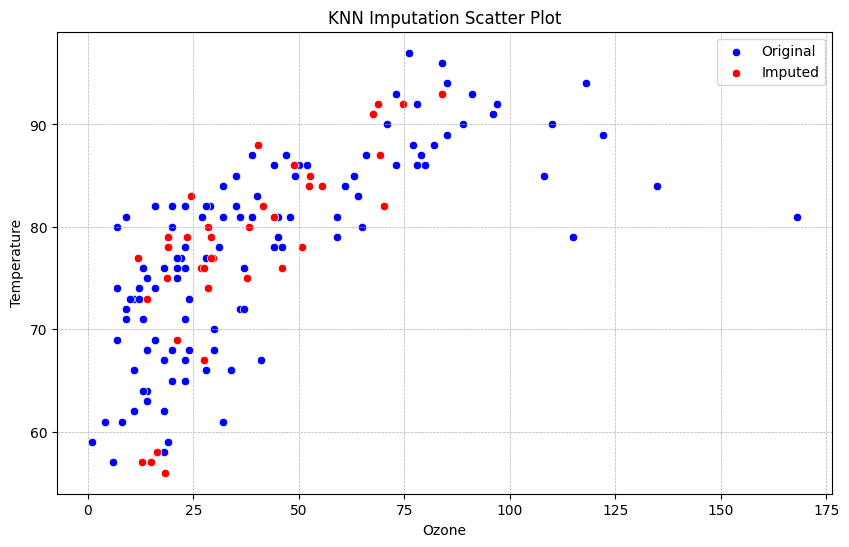

In [18]:
# Plotting results for KNN imputation
plot_scatter_with_imputation(airquality_knn, 'Ozone', 'Temp', mask, 'KNN Imputation Scatter Plot', 'Ozone', 'Temperature')

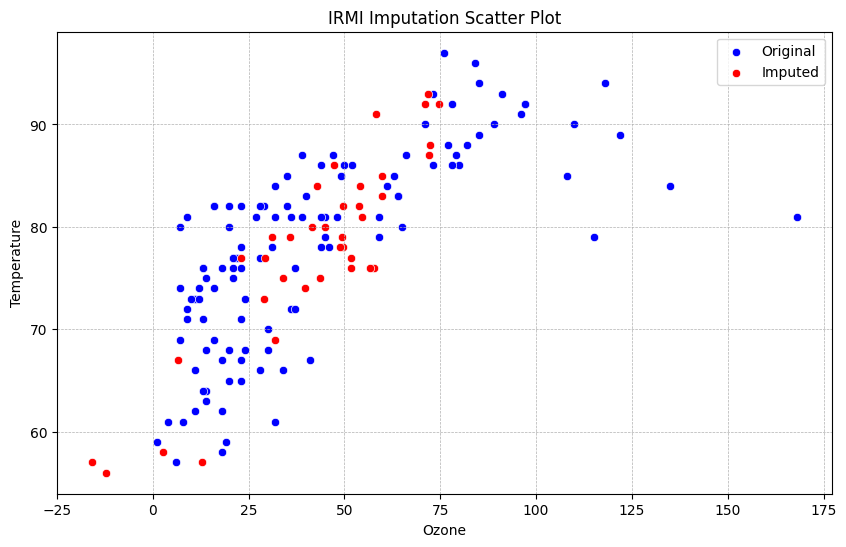

In [20]:
# Plotting results for IRMI imputation
plot_scatter_with_imputation(airquality_irmi, 'Ozone', 'Temp', mask, 'IRMI Imputation Scatter Plot', 'Ozone', 'Temperature')

### Correlation Analysis

In [14]:
print("Correlation in original data:", airquality['Ozone'].corr(airquality['Temp'], method='pearson'))
print("Correlation after KNN imputation:", airquality_knn['Ozone'].corr(airquality_knn['Temp']))
print("Correlation after IRMI:", airquality_irmi['Ozone'].corr(airquality_irmi['Temp']))

Correlation in original data: 0.6983603421509318
Correlation after KNN imputation: 0.6938473095886781
Correlation after IRMI: 0.7251146461034882
